In [1]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)
library(patchwork)

ℹ Using R 4.2.1 (lockfile was generated with R 4.1.3)
[1] "/flash/grp/gglab/xiacr/SLAT-dev/renv/library/R-4.2/x86_64-pc-linux-gnu"         
[2] "/flash/grp/gglab/xiacr/SLAT-dev/renv/sandbox/R-4.2/x86_64-pc-linux-gnu/9a444a72"


Warning message in system2("poetry", c("env", "info", "--path"), stdout = TRUE):
“running command ''poetry' env info --path' had status 1”


python:         /flash/grp/gglab/xiacr/SLAT-dev/conda/bin/python
libpython:      /flash/grp/gglab/xiacr/SLAT-dev/conda/lib/libpython3.8.so
pythonhome:     /flash/grp/gglab/xiacr/SLAT-dev/conda:/flash/grp/gglab/xiacr/SLAT-dev/conda
version:        3.8.17 | packaged by conda-forge | (default, Jun 16 2023, 07:06:00)  [GCC 11.4.0]
numpy:          /flash/grp/gglab/xiacr/SLAT-dev/conda/lib/python3.8/site-packages/numpy
numpy_version:  1.24.4

NOTE: Python version was forced by use_python function
[1] "/flash/grp/gglab/xiacr/SLAT-dev/conda/lib:/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/flash/grp/gglab/xiacr/SpatialLR-dev/resource/jdk1.8.0_361/lib/server:/opt/slurm-22.05.2/lib:/opt/slurm-22.05.2/lib/slurm:"


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# 3 datasets

In [52]:
data <- read_csv('../results/benchmark.csv')
# methods
data <- data[data$cells == 0,] %>% filter(str_detect(method, 'one2many') | str_detect(method, 'PASTE')) %>%
        mutate(method = replace(method, method == 'SLAT_dpca_one2many', 'SLAT')) %>%
        mutate(method = replace(method, method == 'Harmony_one2many', 'Harmony')) %>%
        mutate(method = replace(method, method == 'Seurat_one2many', 'Seurat')) %>%
        mutate(method = replace(method, method == 'STAGATE_one2many', 'STAGATE'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data[nrow(data) + 1,] <- list("stereo_mouse_embryo",0,0,'PASTE',NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA) # PASTE can not run on Stereo-seq

# dataset
data <- data %>%
        mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
        mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
        mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
data %>% head()

Rows: 208 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): dataset, method
dbl (16): cells, seed, angle_delta, celltype_macro_f1, celltype_micro_f1, ce...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,angle_delta,celltype_macro_f1,celltype_micro_f1,celltype_score,edge_score,euclidean_dis,global_score,match_ratio,region_macro_f1,region_micro_f1,region_score,run_time,total_macro_f1,total_micro_f1
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,0,0,Harmony,-1.0000000,-1.0000000,-1.0000000,0.6763880,-1.00000,-1.00000000,0.2556145,-1,-1.000000,-1.0000000,0.3097318,7.136867,-1.00000000,-1.0000000
MERFISH,0,0,PASTE,0.6549213,0.1342908,0.2819713,0.2819713,-26.91017,0.01888113,0.2231753,-1,0.603077,0.7620087,0.7620087,23.333025,0.05608071,0.2231753
MERFISH,0,0,SLAT,-1.0000000,-1.0000000,-1.0000000,0.7559264,-1.00000,-1.00000000,0.4466625,-1,-1.000000,-1.0000000,0.5525577,5.325131,-1.00000000,-1.0000000
MERFISH,0,0,STAGATE,-1.0000000,-1.0000000,-1.0000000,0.3582346,-1.00000,-1.00000000,0.1152527,-1,-1.000000,-1.0000000,0.2735496,30.728875,-1.00000000,-1.0000000
MERFISH,0,0,Seurat,-1.0000000,-1.0000000,-1.0000000,0.6830942,-1.00000,-1.00000000,0.2557704,-1,-1.000000,-1.0000000,0.3109794,81.525000,-1.00000000,-1.0000000
MERFISH,0,1,Harmony,-1.0000000,-1.0000000,-1.0000000,0.6763880,-1.00000,-1.00000000,0.2556145,-1,-1.000000,-1.0000000,0.3097318,6.949664,-1.00000000,-1.0000000


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


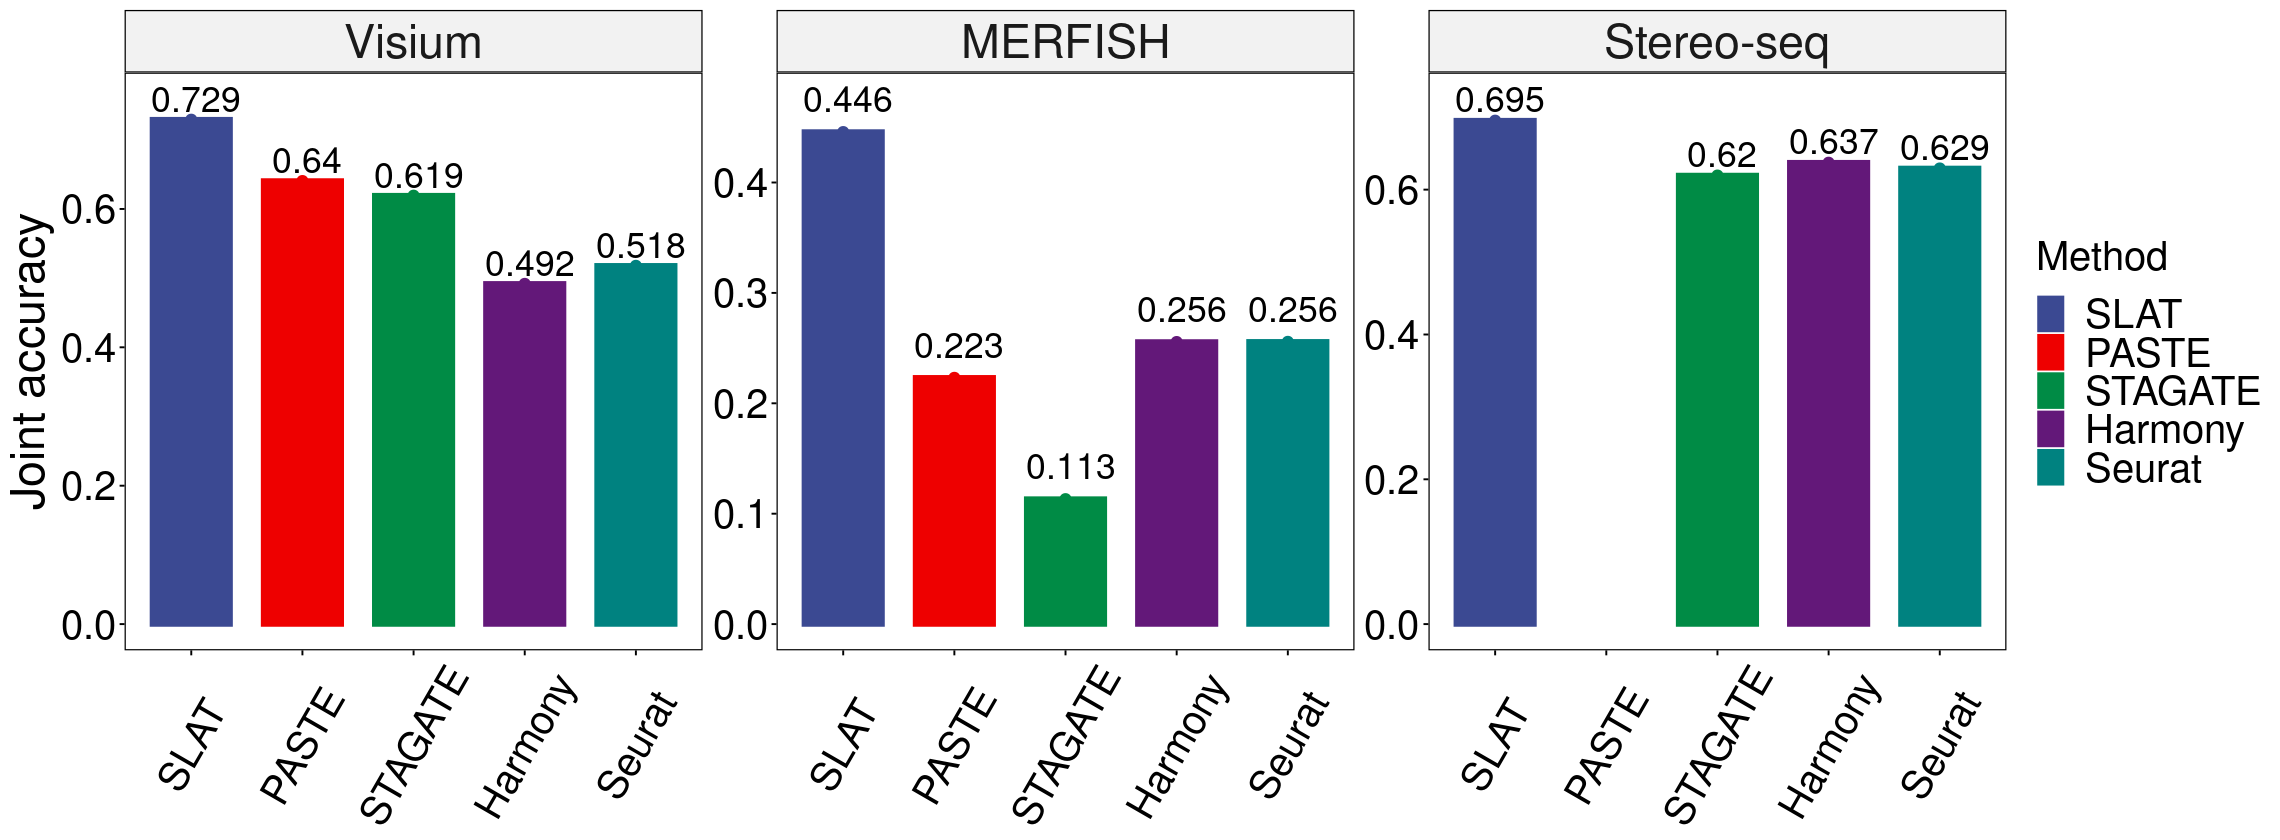

In [53]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="global_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Joint accuracy', size=1.5, lab.size=5, facet.by='dataset', label=F, label.pos="out",
        legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text", size=7.5) +
facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


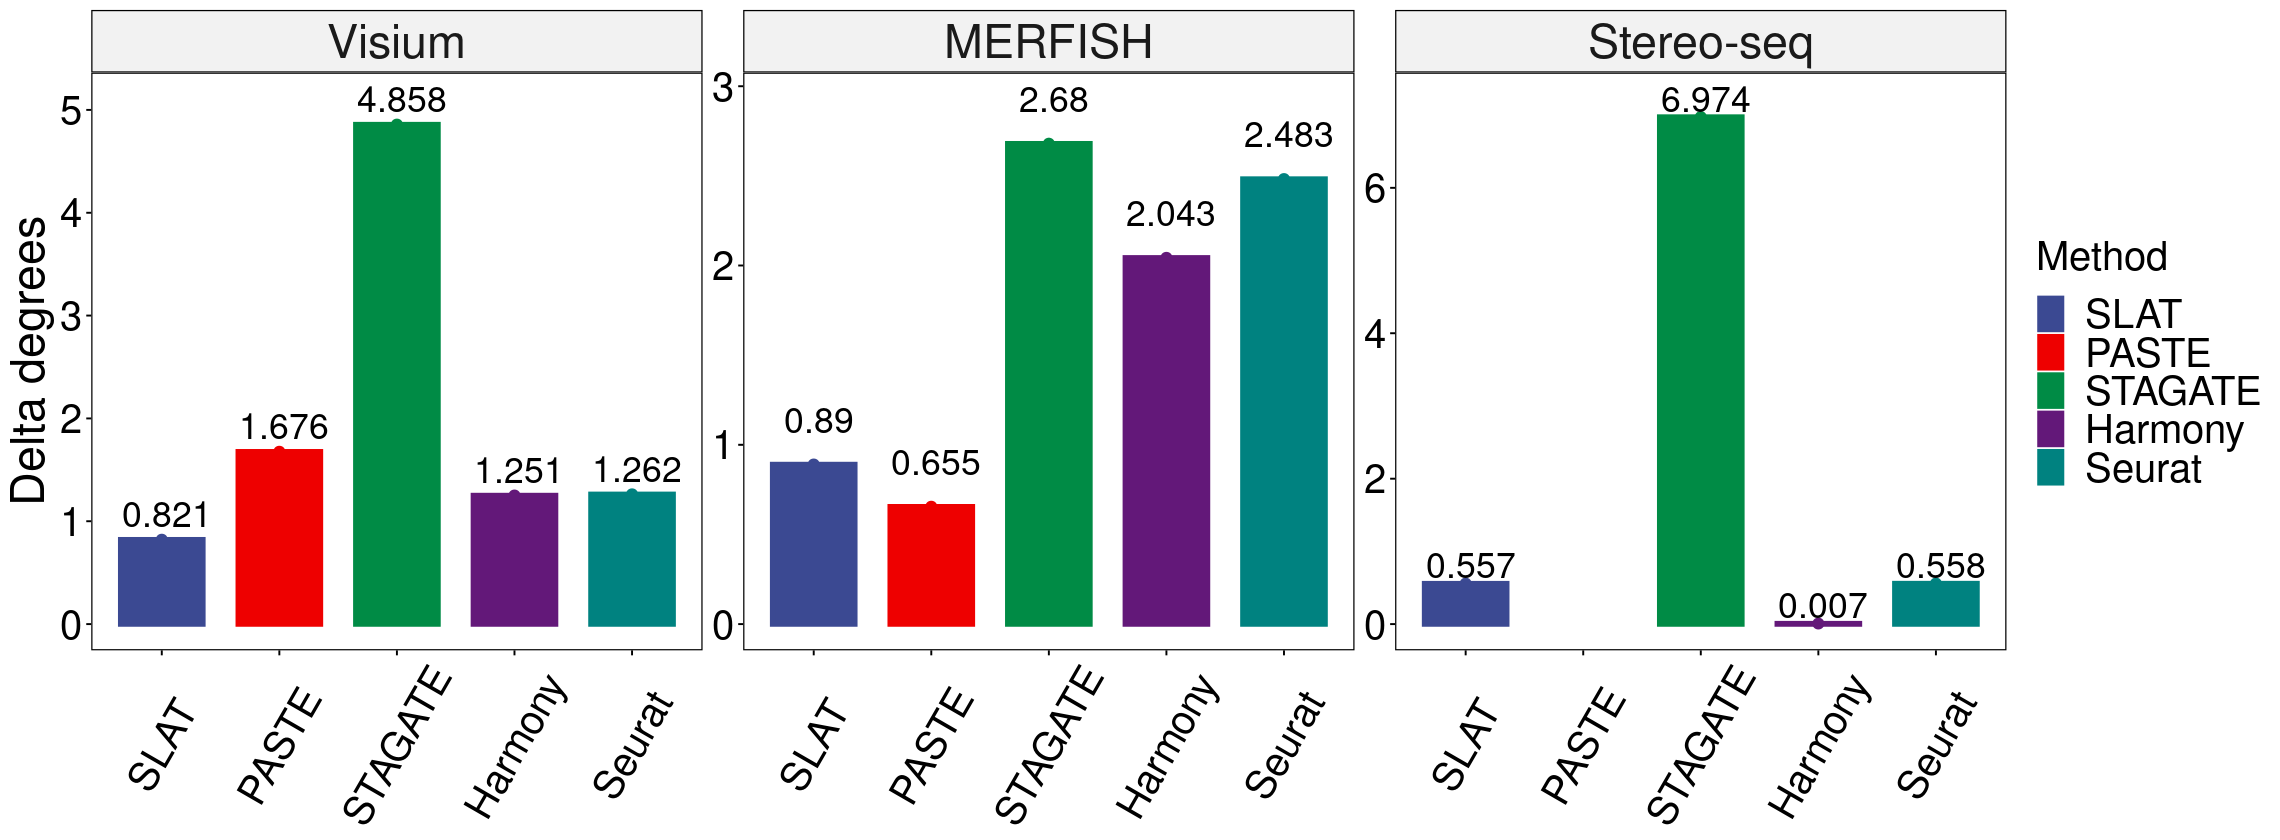

In [99]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="angle_delta", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Delta degrees', size=1.5, lab.size=7.5, facet.by='dataset', label=F, label.pos="in", lab.nb.digits = 3,
        legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.25, label = paste("", round(mean(x), 3))), geom="text", size=7.5) +
facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”


Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


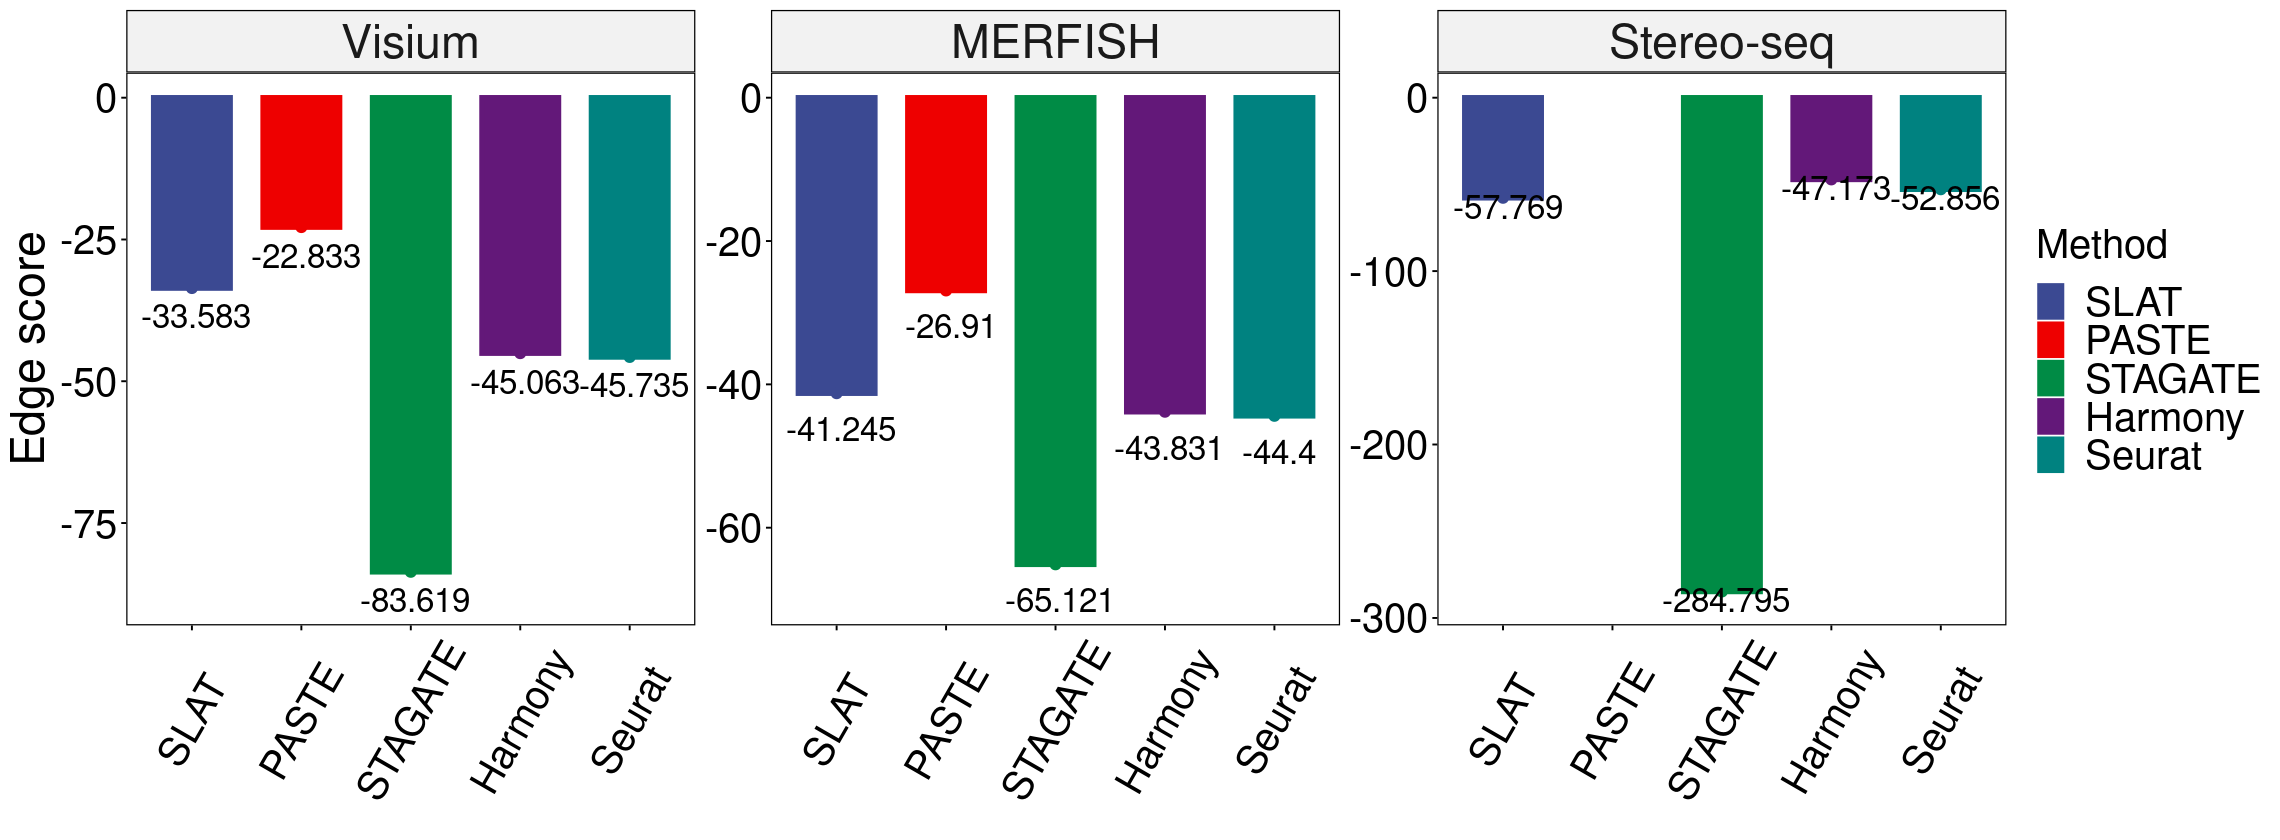

In [87]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="edge_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab='' ,ylab='Edge score', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out",
        legend.title = 'Method') %>% 
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)-5, label = paste("", round(mean(x), 3))), geom="text",size=7) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))


# Heterogeneous benchmarks

In [34]:
data <- read_csv('../results/benchmark_aggr.csv')
data$cells <- as.numeric(data$cells)
data <- data[data$global_score > 0,]
data <- data[data$cells == 0,] %>% filter(method %in% c('SLAT_dpca','PASTE','STAGATE','Harmony','Seurat')) %>% 
        mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT')) %>%
        mutate(method = factor(method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))) 

data <- data %>% filter(str_detect(dataset, 'seqfish'))
data


Rows: 205 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): dataset, method
dbl (16): cells, seed, angle_delta, celltype_macro_f1, celltype_micro_f1, ce...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,angle_delta,celltype_macro_f1,celltype_micro_f1,celltype_score,edge_score,euclidean_dis,global_score,match_ratio,region_macro_f1,region_micro_f1,region_score,run_time,total_macro_f1,total_micro_f1
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stereo_seqfish_embryo_9.5,0,0,Harmony,0.09155054,0.8255515,0.8362155,0.8362155,-40.41026,0.27524038,0.6557344,-1,0.5513545,0.7511429,0.7511429,7.913442,0.32042412,0.6557344
stereo_seqfish_embryo_9.5,0,0,PASTE,7.23824076,0.2391488,0.3802425,0.3802425,-832.27748,0.36839280,0.3357185,-1,0.3255023,0.5404492,0.5404492,39.230683,0.07199999,0.3357185
stereo_seqfish_embryo_9.5,0,0,SLAT,0.90274450,0.8339554,0.8417810,0.8417810,-37.01928,0.09411749,0.7386206,-1,0.6355658,0.8634466,0.8634466,11.765438,0.41741664,0.7386206
stereo_seqfish_embryo_9.5,0,0,STAGATE,8.13436777,0.5783345,0.5978931,0.5978931,-128.87816,0.31041472,0.4744584,-1,0.4802979,0.6571258,0.6571258,36.736217,0.19848521,0.4744584
stereo_seqfish_embryo_9.5,0,0,Seurat,0.92474280,0.8617170,0.8652355,0.8652355,-52.66031,0.23977797,0.6942954,-1,0.5771358,0.7809581,0.7809581,151.162000,0.34277307,0.6942954


Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”


Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”


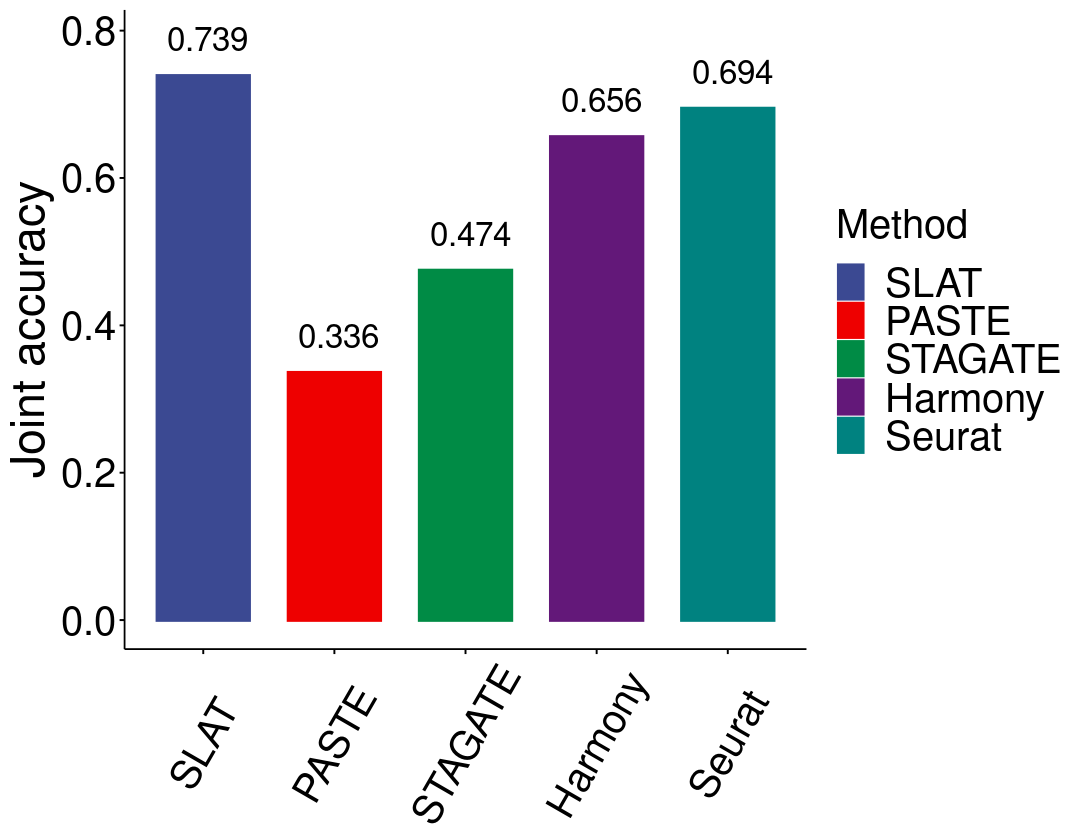

In [35]:
options(repr.plot.width=9, repr.plot.height=7)
ggbarplot(data, x="method", y="global_score", fill='method', color='method',
        add="mean_se", error.plot="upper_errorbar",
        palette='aaas', xlab=F ,ylab='Joint accuracy', size=1, lab.size=5, label.pos="out",
        legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.05, label = paste("", round(mean(x), 3))), geom="text", size=7) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))

# Perturb

In [2]:
data <- read_csv('../perturb/benchmark_purterb.csv')
data$cells <- as.numeric(data$cells)
data <- data[data$global_score > 0,]
data <- data[data$inverse_noise < 3,]
data <- data[data$cells == 0,] %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'SLAT_dpca_one2many')) %>% 
        mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))

data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat', 'PASTE2'))

# add new column name group, if 'visium' in dataset column, then group is 'Visium', if 'merfish' in dataset column, then group is 'MERFISH'
data <- data %>% 
  mutate(group = ifelse(grepl('visium', dataset), 'Visium', ifelse(grepl('merfish', dataset), 'MERFISH', 'Stereo-seq'))) %>%
  mutate(group = factor(group, levels = c('Visium','MERFISH','Stereo-seq'))) %>%
  mutate(method = factor(method, levels = rev(c('SLAT','PASTE','STAGATE','Harmony','Seurat','SLAT_dpca_one2many'))))

data %>% head()

color_aaas <- c('#3B499299', '#EE000099', '#008B4599', '#63187999', '#00828099')
palette_aaas <- get_palette(color_aaas,5)

Rows: 480 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): dataset, method
dbl (16): cells, inverse_noise, seed, angle_delta, celltype_macro_f1, cellty...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,inverse_noise,seed,method,angle_delta,celltype_macro_f1,celltype_micro_f1,celltype_score,euclidean_dis,global_score,match_ratio,region_macro_f1,region_micro_f1,region_score,run_time,total_macro_f1,total_micro_f1,group
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
visium_human_DLPFC,0,0.025,0,Harmony,4.761664e-03,0.0844718,0.1771664,0.1771664,0.531631388,0.01843191,0.001100413,0.1149993,0.2286107,0.2286107,12.067876,0.006588808,0.01843191,Visium
visium_human_DLPFC,0,0.025,0,PASTE,7.105427e-14,1.0000000,1.0000000,1.0000000,0.000000000,1.00000000,1.000000000,1.0000000,1.0000000,1.0000000,21.339859,1.000000000,1.00000000,Visium
visium_human_DLPFC,0,0.025,0,SLAT,6.706342e-03,0.9886329,0.9887208,0.9887208,0.001510037,0.98376891,0.962585970,0.9893651,0.9914718,0.9914718,5.613499,0.974613546,0.98376891,Visium
visium_human_DLPFC,0,0.025,0,STAGATE,1.071483e+00,0.7702434,0.7691884,0.7691884,0.168769413,0.58734525,0.026134801,0.6419745,0.7053645,0.7053645,49.353905,0.271156530,0.58734525,Visium
visium_human_DLPFC,0,0.025,0,Seurat,1.053536e+00,0.6813730,0.6651994,0.6651994,0.290904796,0.46134801,0.158184319,0.4616405,0.5072902,0.5072902,123.565000,0.304869212,0.46134801,Visium
visium_human_DLPFC,0,0.025,1,Harmony,5.891005e-01,0.1198079,0.1906465,0.1906465,0.501404198,0.02971114,0.001100413,0.1220506,0.2343879,0.2343879,9.189226,0.012564688,0.02971114,Visium


In [98]:
get_palette(color_aaas,5)

[1] "#3B4992" "#EE0000" "#008B45" "#631879" "#008280"

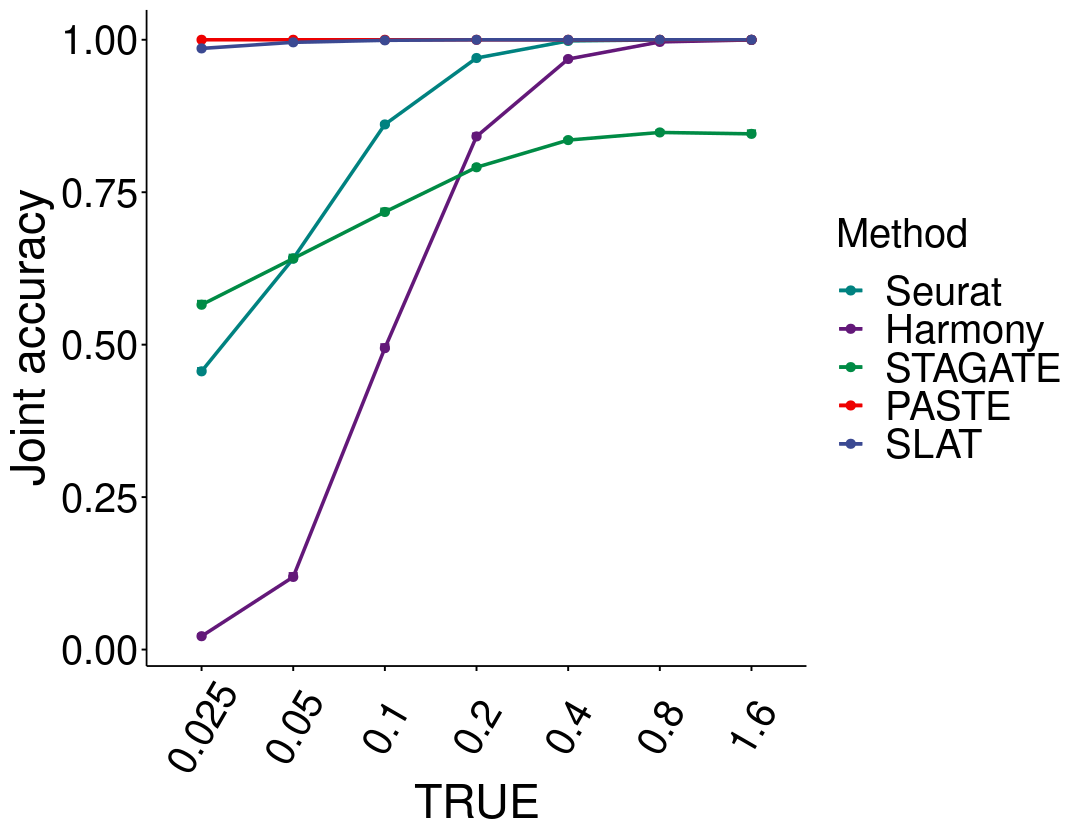

In [99]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="inverse_noise", y="global_score", fill='method', color='method',
        add="mean_se", error.plot="upper_errorbar", palette=rev(palette_aaas), xlab=T ,ylab='Joint accuracy',
        size=1, lab.size=5, label.pos="out", lab.nb.digits=2, legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28, font.x=28) +
# stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.05, label = paste0(100*round(mean(x), 3), "%")), geom="text", size=7) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))

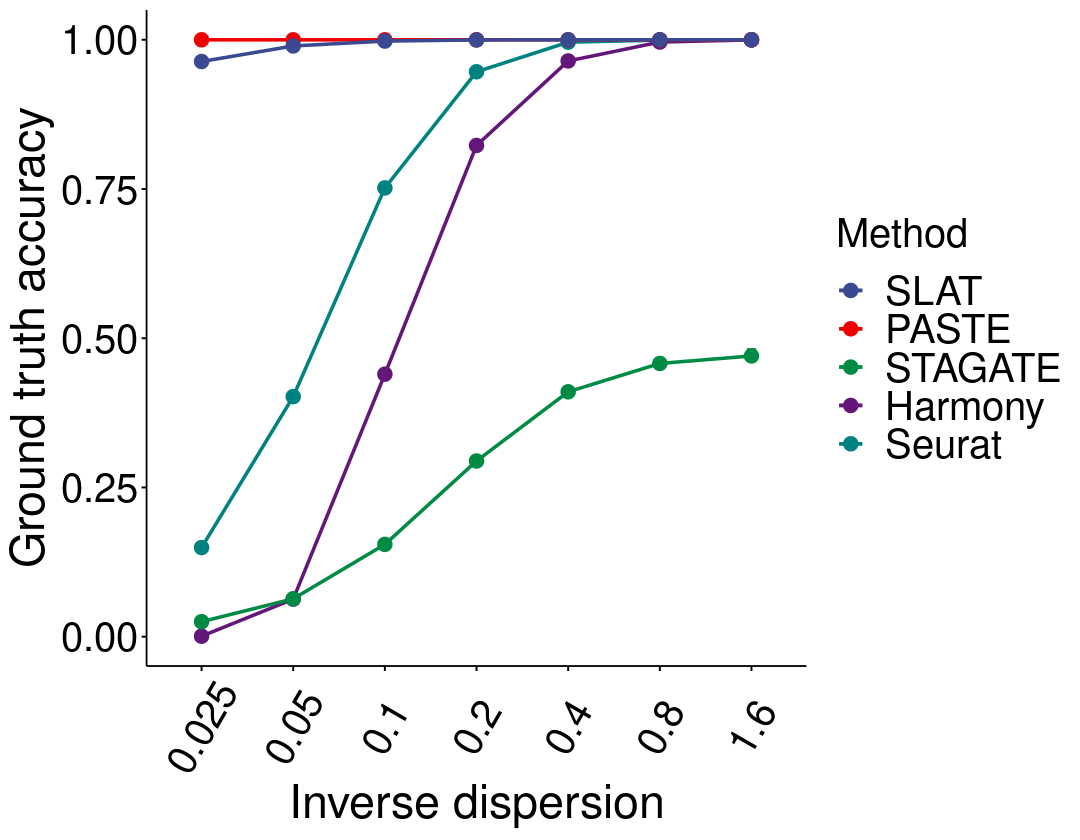

In [3]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="inverse_noise", y="match_ratio", fill='method', color='method', point.size=2.5,
        add="mean_se", error.plot="upper_errorbar", palette=rev(palette_aaas), xlab='Inverse dispersion' ,ylab='Ground truth accuracy',
        size=1, lab.size=5, label.pos="out", lab.nb.digits=2, legend.title='Method', numeric.x.axis=F) %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28, font.x=28) +
# stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.05, label = paste0(100*round(mean(x), 3), "%")), geom="text", size=7) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28)) + guides(colour = guide_legend(reverse=T))
#  scale_x_continuous(breaks=c(31.6, 0.8, 0.4, 0.2 ,0.1, 0.05, 0.025), trans='log2') 

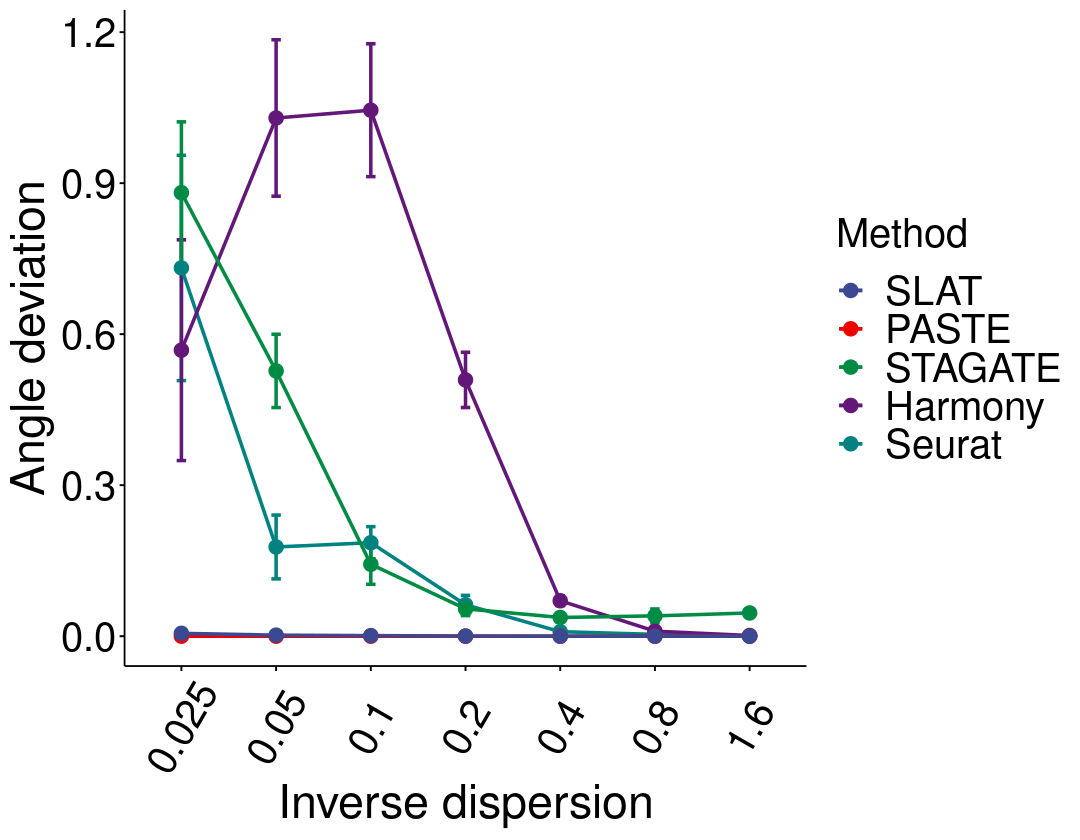

In [106]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="inverse_noise", y="angle_delta", fill='method', color='method', point.size=2.5,
        add="mean_se", error.plot="errorbar", palette=rev(palette_aaas), xlab='Inverse dispersion' ,ylab='Angle deviation',
        size=1, lab.size=5, label.pos="out", lab.nb.digits=2, legend.title='Method', numeric.x.axis=F) %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28, font.x=28) +
# stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.05, label = paste0(100*round(mean(x), 3), "%")), geom="text", size=7) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28)) + guides(colour = guide_legend(reverse=T))
#  scale_x_continuous(breaks=c(31.6, 0.8, 0.4, 0.2 ,0.1, 0.05, 0.025), trans='log2') 

# Compare One-to-One and One-to-Many

In [5]:
data <- read_csv('../results/benchmark.csv')
data[nrow(data) + 1,] <- list("stereo_mouse_embryo",0,0,'PASTE',NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA) # PASTE can not run on Stereo-seq

add_row <- data %>%
  filter(method == "PASTE") %>%
  mutate(method = "PASTE_one2many")
data <- bind_rows(data, add_row)

data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT')) %>%
    mutate(method = replace(method, method == 'SLAT_dpca_one2many', 'SLAT_one2many')) %>%
    mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
    mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
    mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq')) %>%
    separate(method, into = c('method', 'type'), sep = '_') %>%
    mutate(type = replace(type, type == 'one2many', 'one-to-many')) %>%
    replace_na(list(type = 'one-to-one'))

data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat', 'PASTE2'))
data$type <- factor(data$type, levels = c('one-to-one','one-to-many'))
data %>% tail()

Rows: 208 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): dataset, method
dbl (15): cells, seed, angle_delta, celltype_macro_f1, celltype_micro_f1, ce...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 113 rows [1, 3, 4, 6, 8, 10, 12, 13, 15, 17, 19, 21, 22, 24, 26, 28, 30, 31, 33, 35, ...].”


dataset,cells,seed,method,type,angle_delta,celltype_macro_f1,celltype_micro_f1,celltype_score,edge_score,euclidean_dis,global_score,region_macro_f1,region_micro_f1,region_score,run_time,total_macro_f1,total_micro_f1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Visium,0,3,PASTE,one-to-many,1.676417,0.7439865,0.7431296,0.7431296,-22.83287,0.05568886,0.6404936,0.7850734,0.8280987,0.8280987,76.06027,0.2826078,0.6404936
Visium,0,4,PASTE,one-to-many,1.676417,0.7439865,0.7431296,0.7431296,-22.83287,0.05568886,0.6404936,0.7850734,0.8280987,0.8280987,63.53887,0.2826078,0.6404936
Visium,0,5,PASTE,one-to-many,1.676417,0.7439865,0.7431296,0.7431296,-22.83287,0.05568886,0.6404936,0.7850734,0.8280987,0.8280987,78.16175,0.2826078,0.6404936
Visium,0,6,PASTE,one-to-many,1.676417,0.7439865,0.7431296,0.7431296,-22.83287,0.05568886,0.6404936,0.7850734,0.8280987,0.8280987,66.51913,0.2826078,0.6404936
Visium,0,7,PASTE,one-to-many,1.676417,0.7439865,0.7431296,0.7431296,-22.83287,0.05568886,0.6404936,0.7850734,0.8280987,0.8280987,63.57986,0.2826078,0.6404936
Stereo-seq,0,0,PASTE,one-to-many,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 2 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text()`).”


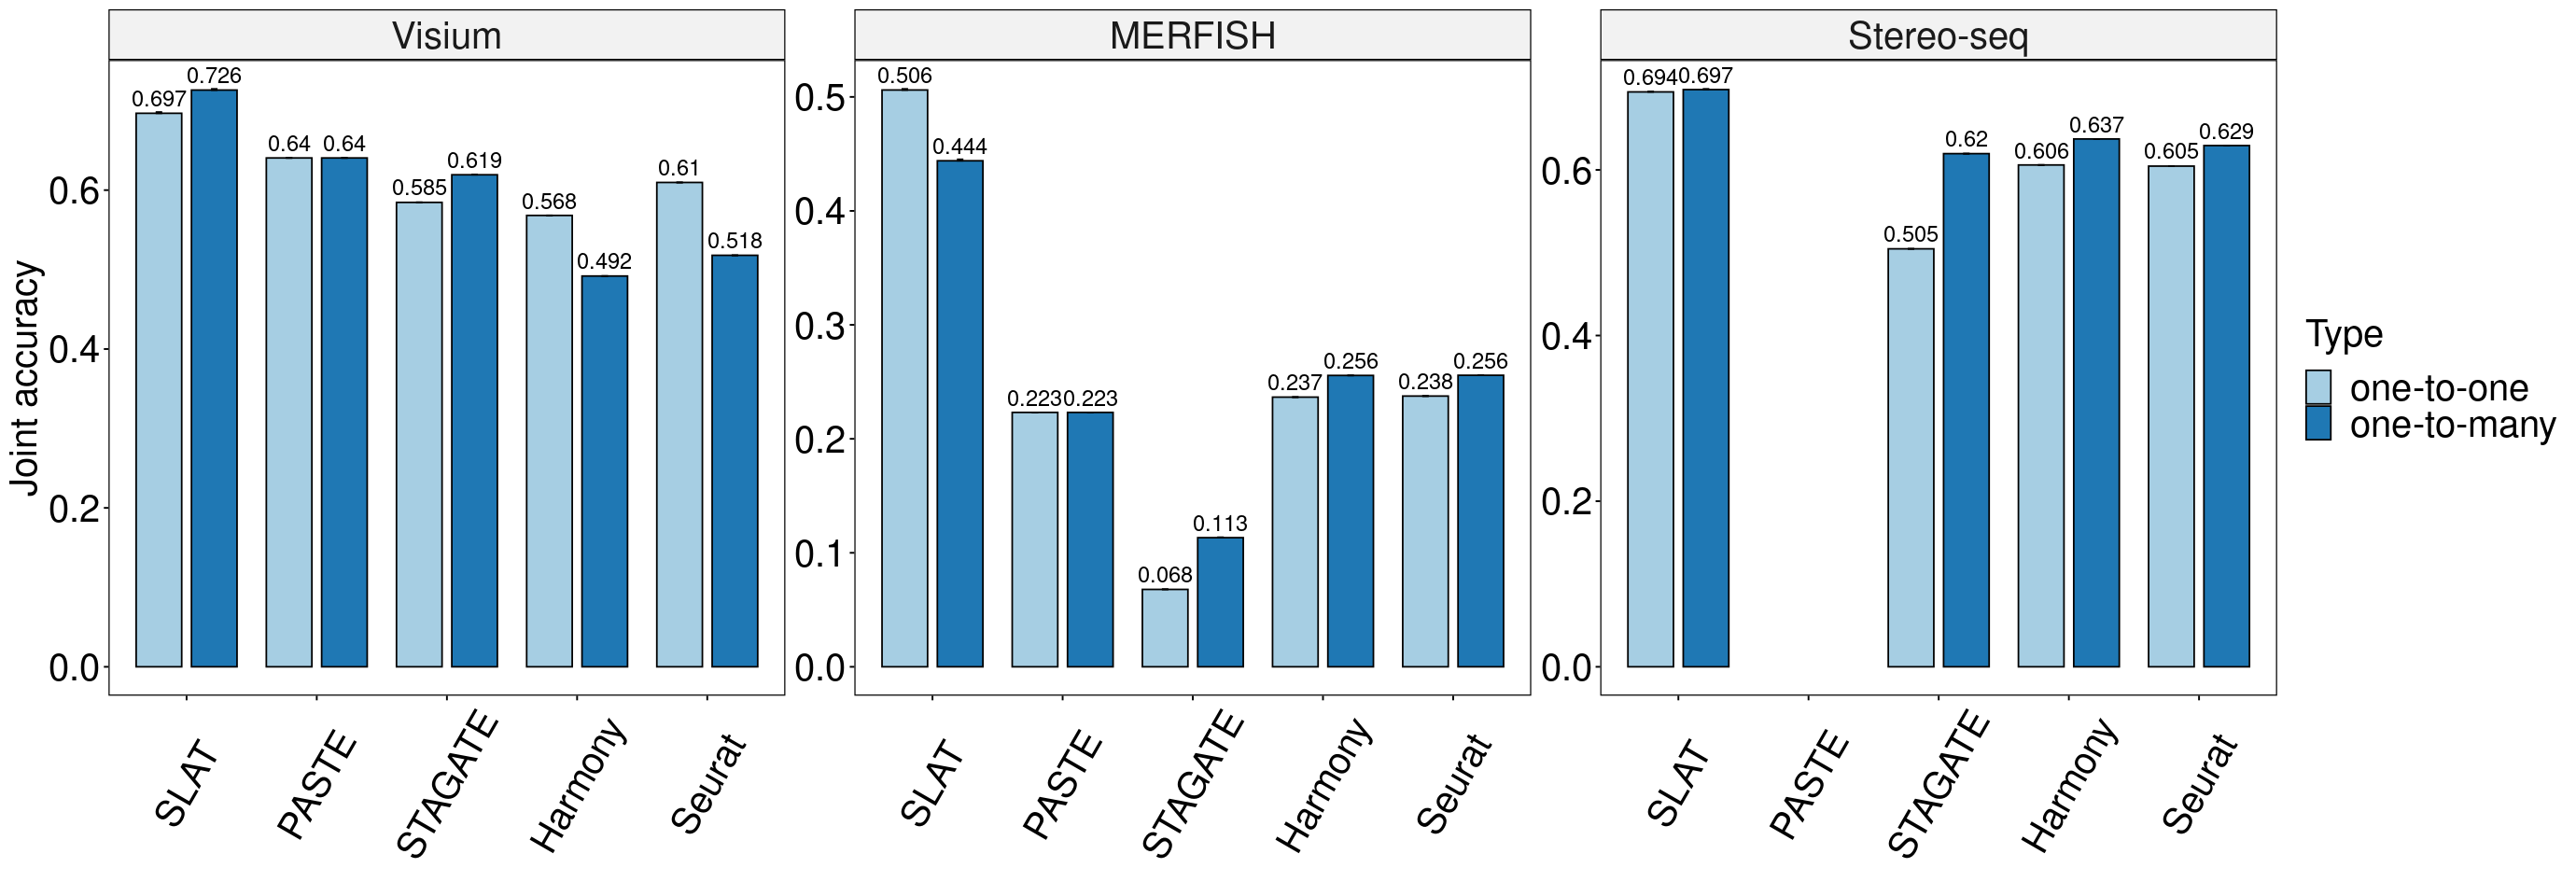

In [6]:
options(repr.plot.width=23, repr.plot.height=8)

ggbarplot(data, x = 'method', y = 'global_score', fill = 'type', palette = 'Paired', ylab= 'Joint accuracy', xlab='',
        add="mean_se",  position = position_dodge(0.85), error.plot="upper_errorbar", label=T,
        lab.nb.digits = 3, lab.size=5, lab.pos= "out", facet.by='dataset') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24, legend.title='Type') +
# stat_summary(fun.data = function(x) data.frame(y = mean(x) + 0.05, label = paste("", round(mean(x), 3))), geom="text", size=8) +
facet_wrap(~dataset, scales="free") + 
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=24)) 

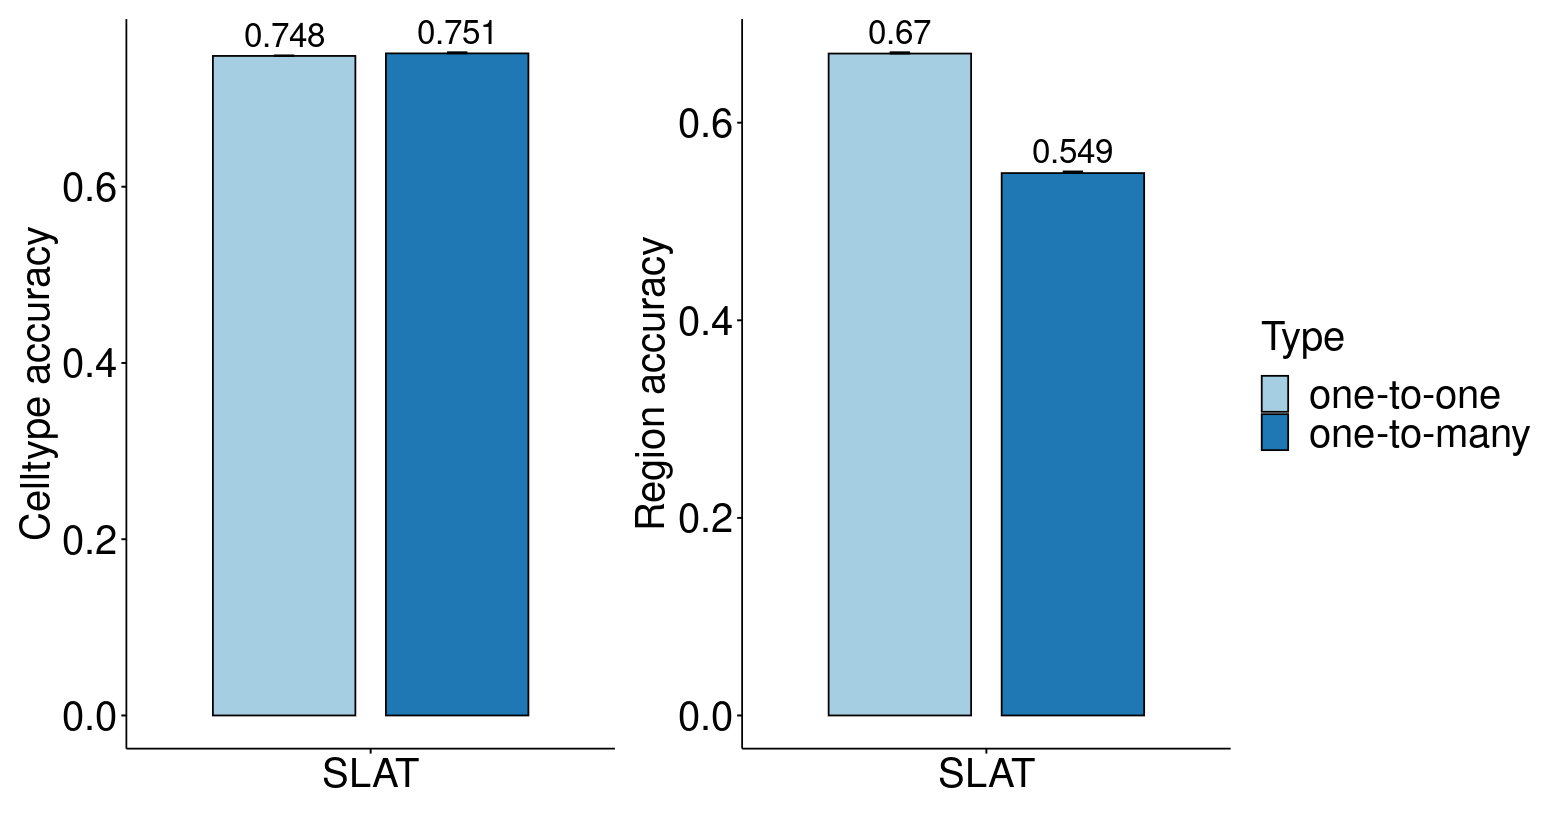

In [7]:
options(repr.plot.width=13, repr.plot.height=7)

a <- data %>% filter(dataset == 'MERFISH') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'celltype_score', fill = 'type', palette = 'Paired', ylab= 'Celltype accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24) + rremove('legend')

b <- data %>% filter(dataset == 'MERFISH') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'region_score', fill = 'type', palette = 'Paired', ylab= 'Region accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24, legend.title='Type')

a + b 

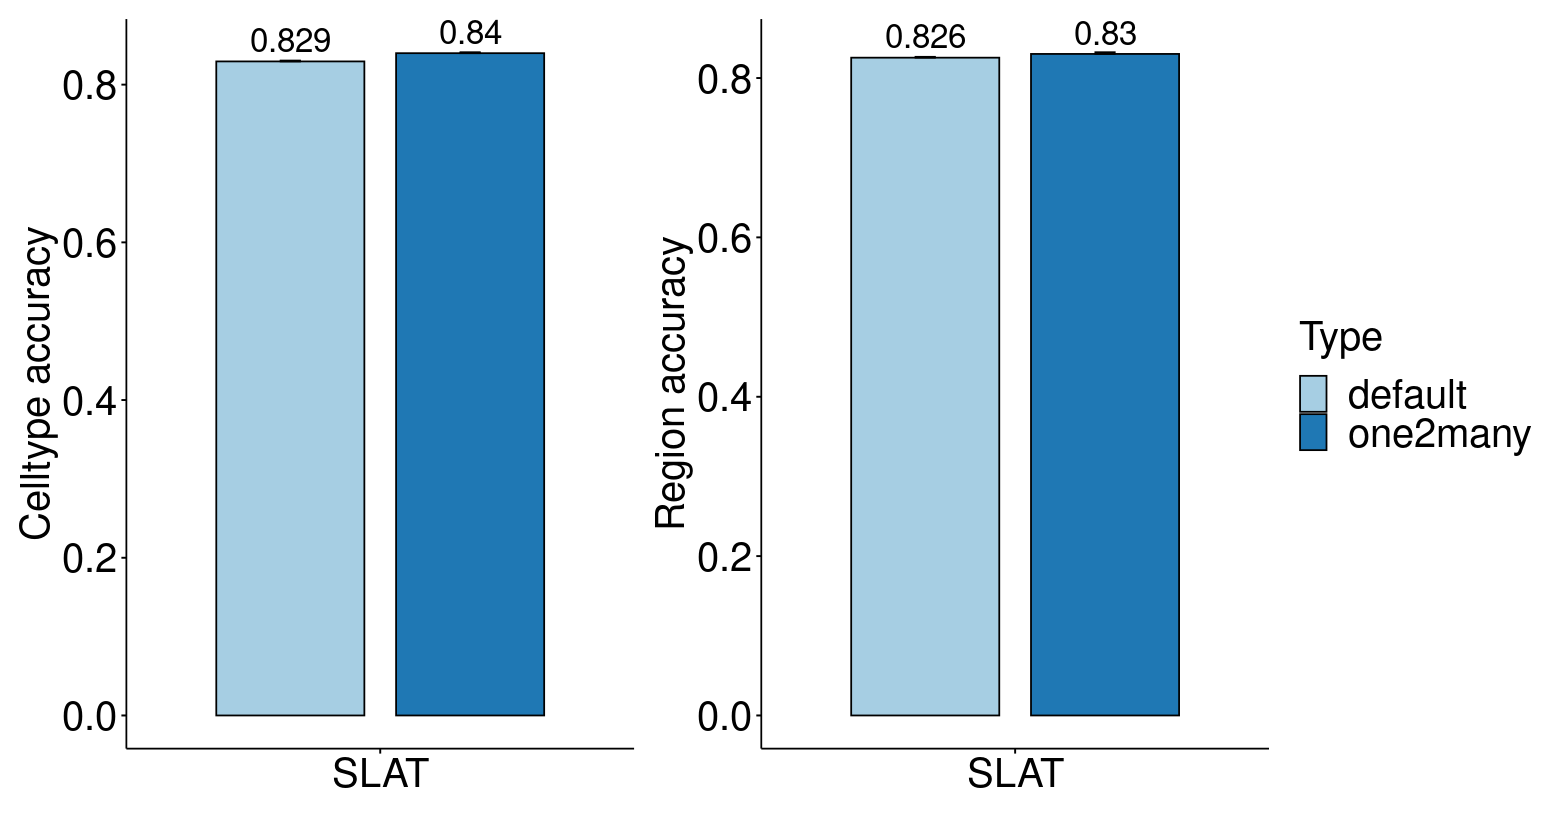

In [124]:
options(repr.plot.width=13, repr.plot.height=7)

a <- data %>% filter(dataset == 'Visium') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'celltype_score', fill = 'type', palette = 'Paired', ylab= 'Celltype accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24) + rremove('legend')

b <- data %>% filter(dataset == 'Visium') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'region_score', fill = 'type', palette = 'Paired', ylab= 'Region accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24, legend.title='Type')

a + b 

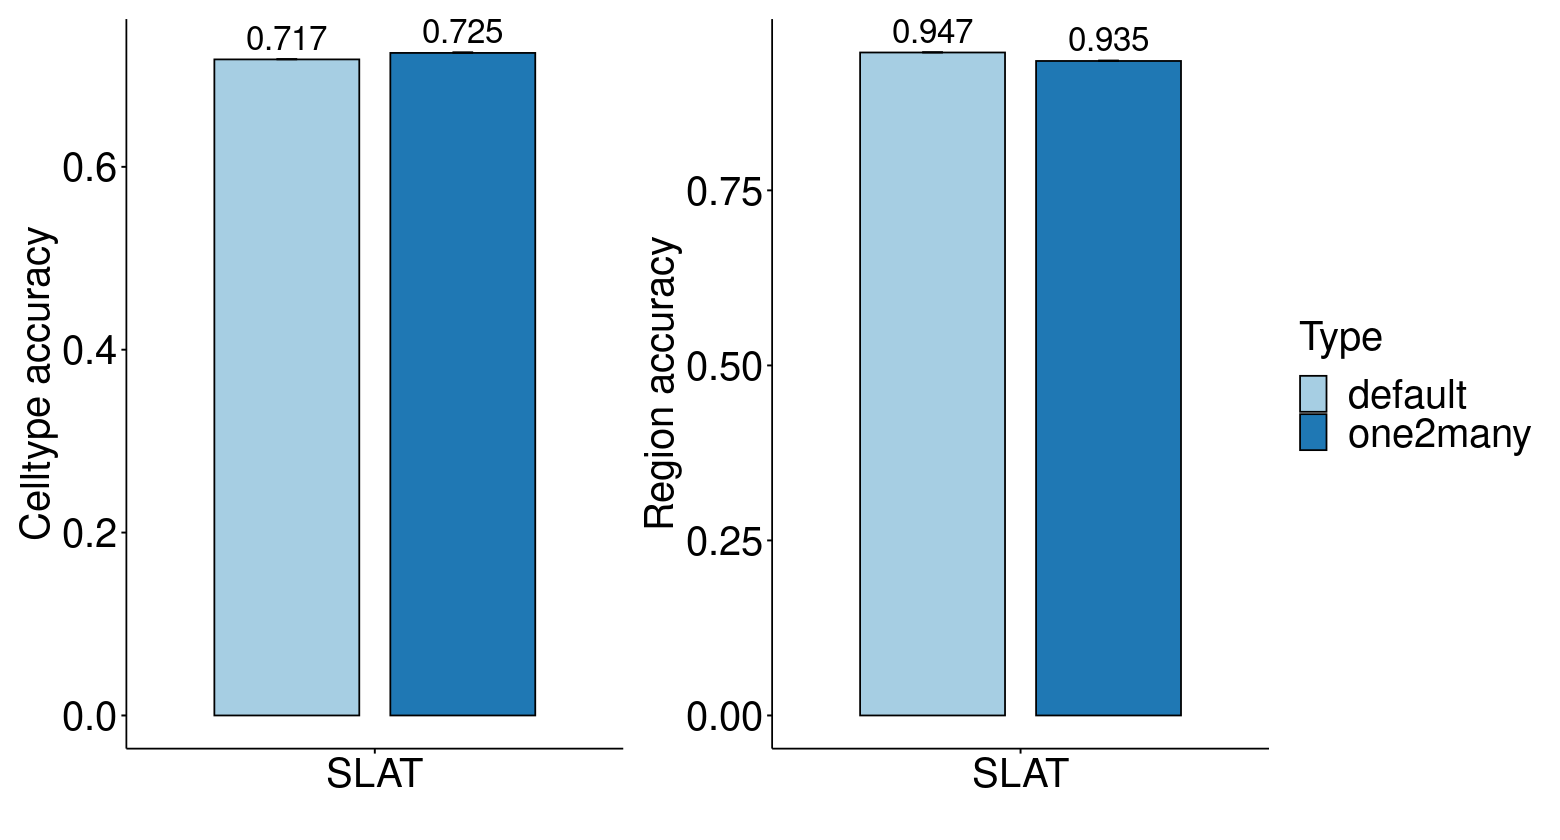

In [125]:
options(repr.plot.width=13, repr.plot.height=7)

a <- data %>% filter(dataset == 'Stereo-seq') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'celltype_score', fill = 'type', palette = 'Paired', ylab= 'Celltype accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24) + rremove('legend')

b <- data %>% filter(dataset == 'Stereo-seq') %>% filter(method == 'SLAT') %>%
    ggbarplot(x = 'method', y = 'region_score', fill = 'type', palette = 'Paired', ylab= 'Region accuracy', xlab='',
     add="mean_se", error.plot="upper_errorbar", position = position_dodge(0.85), lab.nb.digits=3, label=T, lab.size=7) %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=24, legend.title='Type')

a + b 

# Plot the slices statistics

see notebook "neighbor_celltype.ipynb" for the data generation

In [37]:
stats <- read_csv('./neighbor_celltype.csv')
stats

New names:
• `` -> `...1`


Rows: 6 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): index, variable
dbl (2): ...1, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,index,variable,value
<dbl>,<chr>,<chr>,<dbl>
0,slice_0,Visium,0.7966988
1,slice_1,Visium,0.7526640
2,slice_0,MERFISH,0.3368684
3,slice_1,MERFISH,0.3719072
4,slice_0,Stereo-seq,0.8960103
5,slice_1,Stereo-seq,0.8862826


Warning message in (function (mapping = NULL, data = NULL, stat = "count", position = "stack", :
“Ignoring unknown parameters: `label.size`”


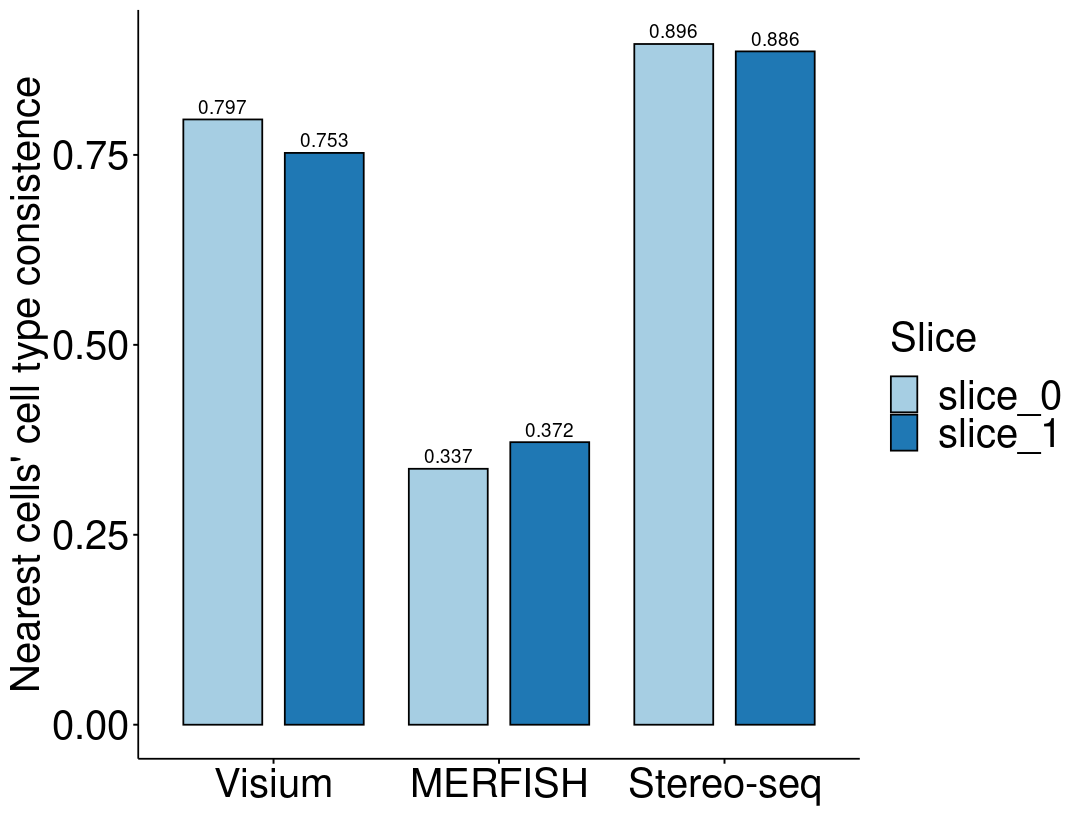

In [50]:
ggbarplot(stats, 'variable', 'value', fill = 'index',  palette = "Paired", 
        label=T, label.size=15, lab.nb.digits=3, position = position_dodge(0.9),
        xlab='', ylab="Nearest cells' cell type consistence") %>%
    ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, 
    font.y=24, legend.title='Slice')
